---
title: "Informe Técnico: Proyecto Segundo Bimestre - IAyAA"
author: " Colcha. A., Charro.D., Chango. G., Mendieta. M., Moyano. S., Christopher. Z."
lang: es
format:
    pdf:
        toc: true
        toc-depth: 8
execute:
    echo: true
    error: false
    warning: false
code-fold: true
jupyter: python3
---

### Introducción

### Objetivos

### Desarrollo

Cargamos las librerías y leemos el dataset completo

In [2]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [208]:
data = pd.read_csv('bdd_cp2022.csv', sep = ';', low_memory=False)
data.sample(5)

,INTERVIEW__ID,F1_S1_P0,F1_S1_CPPL,F1_S1_I01,F1_S1_I02,F1_S1_I03,F1_S1_I04,F1_S1_I05,F1_S1_I06,F1_S1_I07,...,F1_S6P02__99,F1_S6P02_19,F1_S6P0301,F1_S6P0302,F1_S6P04,F1_SF_F_LGBTI_DIA,F1_SF_F_LGBTI_MES,F1_SF_LGBTI_ANIO,F1_SF_RES_LEV,F1_SF_MOT_NR
29999,180c19c6c4d24504be58a4585135b7cc,6,139,14,1401,140150,8,5,2,0,...,,,2,2,,9,9,2022,1,
17445,9ef88186d8714824a8865000e7ab3e4d,4,1837,5,501,50153,999,14,0,5,...,,,2,2,,25,9,2022,1,
27206,77fd06f9891d460aa9d6fc7429cbbad6,6,2390,9,901,90150,670,1,1,0,...,,,2,2,,5,12,2022,1,
26099,a3e6febd84b647bdaf854e4a4b95b707,12,228,13,1314,131450,5,7,6,0,...,,,2,2,,23,9,2022,1,
3955,45c53ee7b4f748dab6d923e3784b8a2d,8,2684,9,901,90150,670,1,1,0,...,0,,1,2,2,5,12,2022,1,


In [209]:
data.shape

(31321, 398)

### Preparación de datos
Creamos un array con el nombre de las columnas seleccionadas para el proyecto

In [210]:
features = ['F1_S2_P02', 'F1_S2_P0701','F1_S2_P0702', 'F1_S2_P0703', 'F1_S2_P0704', 
            'F1_S2_P0705', 'F1_S2_P0706', 'F1_S2_P14', 'F1_S2_P15', 'F1_S2_P19', 
            'F1_S2_P25', 'F1_S4P16__2', 'F1_S4P16__3', 'F1_S4P16__4', 'F1_S4P16__5', 
            'F1_S4P16__6','F1_S4P16__7', 'F1_S4P16__8', 'F1_S4P16__9', 'F1_S4P16__10', 
            'F1_S4P16__11','F1_S4P16__12','F1_S4P16__13', 'F1_S4P16__14', 'F1_S4P16__15', 
            'F1_S4P16__16','F1_S4P16__17', 'F1_S4P16__18', 'F1_S4P16__19','F1_S4P16__99', 
            'F1_S5P1901', 'F1_S5P1902', 'F1_S5P1903', 'F1_S5P1904','F1_S5P1905', 
            'F1_S5P1906', 'F1_S5P1907', 'F1_S5P21', 'F1_S5P33', 'F1_S5P3501',
           'F1_S5P3502', 'F1_S5P3503', 'F1_S5P3504', 'F1_S5P3505', 'F1_S5P3506',
            'F1_S5P3601','F1_S5P3602', 'F1_S5P3603', 'F1_S5P42', 'F1_S5P53', 'F1_S5P41__7']

In [211]:
data_select = pd.DataFrame(columns = features)

In [212]:
for i in features:
    data_select[i] = data[i] 

In [213]:
data_select.shape

(31321, 51)

In [214]:
data_select.sample(5)

,F1_S2_P02,F1_S2_P0701,F1_S2_P0702,F1_S2_P0703,F1_S2_P0704,F1_S2_P0705,F1_S2_P0706,F1_S2_P14,F1_S2_P15,F1_S2_P19,...,F1_S5P3503,F1_S5P3504,F1_S5P3505,F1_S5P3506,F1_S5P3601,F1_S5P3602,F1_S5P3603,F1_S5P42,F1_S5P53,F1_S5P41__7
30129,1,1,1,1,1,2,1,2,2,,...,2,2,2,2,2,2,1,1,1,0
19856,1,1,1,1,1,1,1,2,2,,...,2,2,2,2,2,1,1,2,1,0
7439,1,1,1,1,1,1,1,2,2,,...,2,2,2,2,2,2,2,1,1,0
17998,1,1,1,1,1,1,1,2,2,1,...,2,2,2,2,1,2,2,2,1,0
18488,1,1,1,1,1,1,1,2,2,1,...,2,2,2,2,1,1,2,2,1,1


In [215]:
for i in data_select.columns:
    data_select[i] = data_select[i].astype('category')

data_select.dtypes

F1_S2_P02       category
F1_S2_P0701     category
F1_S2_P0702     category
F1_S2_P0703     category
F1_S2_P0704     category
F1_S2_P0705     category
F1_S2_P0706     category
F1_S2_P14       category
F1_S2_P15       category
F1_S2_P19       category
F1_S2_P25       category
F1_S4P16__2     category
F1_S4P16__3     category
F1_S4P16__4     category
F1_S4P16__5     category
F1_S4P16__6     category
F1_S4P16__7     category
F1_S4P16__8     category
F1_S4P16__9     category
F1_S4P16__10    category
F1_S4P16__11    category
F1_S4P16__12    category
F1_S4P16__13    category
F1_S4P16__14    category
F1_S4P16__15    category
F1_S4P16__16    category
F1_S4P16__17    category
F1_S4P16__18    category
F1_S4P16__19    category
F1_S4P16__99    category
F1_S5P1901      category
F1_S5P1902      category
F1_S5P1903      category
F1_S5P1904      category
F1_S5P1905      category
F1_S5P1906      category
F1_S5P1907      category
F1_S5P21        category
F1_S5P33        category
F1_S5P3501      category


In [216]:
for i in data_select.columns:
    print(i, ':', data_select[i].cat.categories)


F1_S2_P02 : Int64Index([1, 2], dtype='int64')
F1_S2_P0701 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0702 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0703 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0704 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0705 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0706 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P14 : Index([' ', '1', '2'], dtype='object')
F1_S2_P15 : Index([' ', '1', '2'], dtype='object')
F1_S2_P19 : Index([' ', '1', '2', '9'], dtype='object')
F1_S2_P25 : Index([' ', '1', '2'], dtype='object')
F1_S4P16__2 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__3 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__4 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__5 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__6 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__7 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__8 : Index([' ', '0', '1'], dtype='object')
F1_S4P16__9 : Index([' ', '0', '1'], dtype='object

In [217]:
data_select = data_select.replace(' ', np.nan)

In [218]:
data_select = data_select.dropna()

In [219]:
#Unificando las variables 'No sabe' y 'No responde' en una sola
data_select = data_select.replace('8', '3')
data_select = data_select.replace('9', '3')

In [220]:
for i in data_select.columns:
    print(i, ':', data_select[i].cat.categories)

F1_S2_P02 : Int64Index([1, 2], dtype='int64')
F1_S2_P0701 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0702 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0703 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0704 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0705 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P0706 : Int64Index([1, 2, 3, 4], dtype='int64')
F1_S2_P14 : Index(['1', '2'], dtype='object')
F1_S2_P15 : Index(['1', '2'], dtype='object')
F1_S2_P19 : Index(['1', '2', '3'], dtype='object')
F1_S2_P25 : Index(['1', '2'], dtype='object')
F1_S4P16__2 : Index(['0', '1'], dtype='object')
F1_S4P16__3 : Index(['0', '1'], dtype='object')
F1_S4P16__4 : Index(['0', '1'], dtype='object')
F1_S4P16__5 : Index(['0', '1'], dtype='object')
F1_S4P16__6 : Index(['0', '1'], dtype='object')
F1_S4P16__7 : Index(['0', '1'], dtype='object')
F1_S4P16__8 : Index(['0', '1'], dtype='object')
F1_S4P16__9 : Index(['0', '1'], dtype='object')
F1_S4P16__10 : Index(['0', '1'], dtype='object')
F1_S4P16

In [221]:
#Group 1


columns = ['F1_S2_P0701','F1_S2_P0702', 'F1_S2_P0703', 
           'F1_S2_P0704', 'F1_S2_P0705', 'F1_S2_P0706']
for i in columns:
    data_select[i] = data_select[i].cat.rename_categories(['0', '1', '2', '3'])
    
#Group 2  
columns = [  'F1_S2_P19','F1_S5P1901', 'F1_S5P1902', 'F1_S5P1903', 'F1_S5P1904','F1_S5P1905', 
            'F1_S5P1906', 'F1_S5P1907', 'F1_S5P21', 'F1_S5P33',  'F1_S5P42', 'F1_S5P53']
for i in columns:
    data_select[i] = data_select[i].cat.rename_categories(['0', '1', '2']) 
    
#Group 3
columns = ['F1_S2_P02','F1_S2_P14', 
           'F1_S2_P15', 'F1_S2_P25','F1_S5P3501',
           'F1_S5P3502', 'F1_S5P3503', 'F1_S5P3504', 'F1_S5P3505', 'F1_S5P3506',
            'F1_S5P3601','F1_S5P3602', 'F1_S5P3603']
for i in columns:
    data_select[i] = data_select[i].cat.rename_categories(['0', '1']) 


In [222]:
for i in data_select.columns:
    print(i, ':', data_select[i].cat.categories)

F1_S2_P02 : Index(['0', '1'], dtype='object')
F1_S2_P0701 : Index(['0', '1', '2', '3'], dtype='object')
F1_S2_P0702 : Index(['0', '1', '2', '3'], dtype='object')
F1_S2_P0703 : Index(['0', '1', '2', '3'], dtype='object')
F1_S2_P0704 : Index(['0', '1', '2', '3'], dtype='object')
F1_S2_P0705 : Index(['0', '1', '2', '3'], dtype='object')
F1_S2_P0706 : Index(['0', '1', '2', '3'], dtype='object')
F1_S2_P14 : Index(['0', '1'], dtype='object')
F1_S2_P15 : Index(['0', '1'], dtype='object')
F1_S2_P19 : Index(['0', '1', '2'], dtype='object')
F1_S2_P25 : Index(['0', '1'], dtype='object')
F1_S4P16__2 : Index(['0', '1'], dtype='object')
F1_S4P16__3 : Index(['0', '1'], dtype='object')
F1_S4P16__4 : Index(['0', '1'], dtype='object')
F1_S4P16__5 : Index(['0', '1'], dtype='object')
F1_S4P16__6 : Index(['0', '1'], dtype='object')
F1_S4P16__7 : Index(['0', '1'], dtype='object')
F1_S4P16__8 : Index(['0', '1'], dtype='object')
F1_S4P16__9 : Index(['0', '1'], dtype='object')
F1_S4P16__10 : Index(['0', '1'], 

Ahora que todas nuestras variables estan estandarizadas como variables categóricas respectivamente, debemos preparar la variable target. Dado que en los datos esta corresponde a `No le gustaría participar en ningún eje de tratamiento` por tanto el valor de `1` nos dice que no va a participar de ningún eje y viceversa. 

Es por eso que, para facilitar la lectura y comprensión de la predicción lo que haremos es invertir estos valores para que la predicción nos responda claramente si `Participaría en algún eje de tratamiento`

In [223]:
data_select['F1_S5P41__7'].value_counts()

0    8769
1     439
Name: F1_S5P41__7, dtype: int64

In [224]:
data_select['F1_S5P41__7'] = data_select['F1_S5P41__7'].replace('0', 'Si')
data_select['F1_S5P41__7'] = data_select['F1_S5P41__7'].replace('1', 'No')

In [225]:
data_select['F1_S5P41__7'] = data_select['F1_S5P41__7'].replace('Si','1')
data_select['F1_S5P41__7'] = data_select['F1_S5P41__7'].replace( 'No', '0')

In [226]:
data_select['F1_S5P41__7'].value_counts()

1    8769
0     439
Name: F1_S5P41__7, dtype: int64

Ahora tenemos claro que `0 = No` y `1 = Si`.


### Selección de variables

Ahora que los datos están listos, separamos la variable target de las features para analizar que la importancia de los datos con los que vamos a trabajar 

In [227]:
y = data_select['F1_S5P41__7']
x = data_select.drop(columns='F1_S5P41__7')

In [228]:
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)  
df_columns = pd.DataFrame(x.columns)   #nombres de las features
scores = pd.concat([df_columns,df_scores],axis=1)
scores.columns = ['caracteristicas','score']

In [229]:
smallest = scores.nsmallest(25,'score')
smallest

,caracteristicas,score
7,F1_S2_P14,0.004293
23,F1_S4P16__14,0.005197
0,F1_S2_P02,0.012202
13,F1_S4P16__4,0.048196
34,F1_S5P1905,0.051424
36,F1_S5P1907,0.068020
31,F1_S5P1902,0.091709
32,F1_S5P1903,0.095774
30,F1_S5P1901,0.095774
24,F1_S4P16__15,0.101564


Aquí podemos ver 25 de nuestras features que mantiene muy poca relación con nuestra variable target, por tanto vamos a descartar a todas ellas que mantienen una relación menor a `1`.

In [230]:
smallest.set_index(['caracteristicas'], inplace=True)

In [231]:
no_relevant = []
for i in smallest.score.index:
    if smallest.loc[i, :].item() < 1:
        no_relevant.append(i)

In [232]:
no_relevant

['F1_S2_P14',
 'F1_S4P16__14',
 'F1_S2_P02',
 'F1_S4P16__4',
 'F1_S5P1905',
 'F1_S5P1907',
 'F1_S5P1902',
 'F1_S5P1903',
 'F1_S5P1901',
 'F1_S4P16__15',
 'F1_S5P1904',
 'F1_S4P16__11',
 'F1_S4P16__8',
 'F1_S4P16__2',
 'F1_S4P16__10',
 'F1_S5P1906',
 'F1_S4P16__18',
 'F1_S4P16__13',
 'F1_S5P3505',
 'F1_S4P16__16',
 'F1_S4P16__7',
 'F1_S5P33']

In [233]:
data_select = data_select.drop(columns= no_relevant)

In [234]:
data_select.shape

(9208, 29)

In [235]:
y = data_select['F1_S5P41__7']
x = data_select.drop(columns='F1_S5P41__7')

In [236]:
x.columns

Index(['F1_S2_P0701', 'F1_S2_P0702', 'F1_S2_P0703', 'F1_S2_P0704',
       'F1_S2_P0705', 'F1_S2_P0706', 'F1_S2_P15', 'F1_S2_P19', 'F1_S2_P25',
       'F1_S4P16__3', 'F1_S4P16__5', 'F1_S4P16__6', 'F1_S4P16__9',
       'F1_S4P16__12', 'F1_S4P16__17', 'F1_S4P16__19', 'F1_S4P16__99',
       'F1_S5P21', 'F1_S5P3501', 'F1_S5P3502', 'F1_S5P3503', 'F1_S5P3504',
       'F1_S5P3506', 'F1_S5P3601', 'F1_S5P3602', 'F1_S5P3603', 'F1_S5P42',
       'F1_S5P53'],
      dtype='object')

### Separación de datos

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from metric import AIC_score, classificationSummary

In [238]:
column_to_exclude = 'F1_S5P41__7'

# Obtenemos las dummies de todas las columnas excepto la que queremos excluir
encoded_data = pd.get_dummies(data_select.drop(columns=[column_to_exclude]), drop_first=True)

# Luego, podemos agregar nuevamente la columna excluida al DataFrame codificado
encoded_data[column_to_exclude] = data_select[column_to_exclude]

In [239]:
encoded_data['F1_S5P41__7'] = encoded_data['F1_S5P41__7'].astype('uint8')

In [240]:
encoded_y = encoded_data['F1_S5P41__7']
encoded_x = encoded_data.drop(columns='F1_S5P41__7')

In [241]:
## lo que separas el training y test
train_x, valid_x, train_y, valid_y = train_test_split(encoded_x, encoded_y, test_size=0.4, random_state=1)

In [242]:
valid_y

17761    1
14815    1
15531    1
22255    1
9547     1
        ..
3965     1
8813     1
18617    1
25618    1
20704    1
Name: F1_S5P41__7, Length: 3684, dtype: uint8

### Entrenamiento y evaluación de modelos

#### Regresion Logistica

In [248]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_x, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [244]:
print('intercept ', logit_reg.intercept_[0])
#print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=encoded_x.columns))
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_x), df = len(train_x.columns) + 1))

intercept  13.386936011482767
                   coeff
F1_S2_P0701_1   0.285141
F1_S2_P0701_2   0.277278
F1_S2_P0701_3  -1.299667
F1_S2_P0702_1  -0.365844
F1_S2_P0702_2  -0.564045
F1_S2_P0702_3  -0.005084
F1_S2_P0703_1  -0.501584
F1_S2_P0703_2  -0.620201
F1_S2_P0703_3  -1.830421
F1_S2_P0704_1  -0.055375
F1_S2_P0704_2   0.028123
F1_S2_P0704_3   0.567997
F1_S2_P0705_1   0.282988
F1_S2_P0705_2   0.219616
F1_S2_P0705_3   1.970115
F1_S2_P0706_1  -0.102739
F1_S2_P0706_2  -0.733338
F1_S2_P0706_3   1.043834
F1_S2_P15_1    -1.166676
F1_S2_P19_1    -0.239079
F1_S2_P19_2     0.012906
F1_S2_P25_1    -0.324770
F1_S4P16__3_1  -1.489032
F1_S4P16__5_1   0.046696
F1_S4P16__6_1  -0.054210
F1_S4P16__9_1  -0.768443
F1_S4P16__12_1  0.257775
F1_S4P16__17_1 -1.303737
F1_S4P16__19_1 -0.109801
F1_S4P16__99_1 -2.837584
F1_S5P21_1     -0.036841
F1_S5P21_2     -2.389769
F1_S5P3501_1   -0.339776
F1_S5P3502_1   -0.330919
F1_S5P3503_1   -0.198673
F1_S5P3504_1   -0.541852
F1_S5P3506_1   -6.802575
F1_S5P3601_1   -0.94

In [245]:
logit_reg_pred = logit_reg.predict(valid_x)
logit_reg_proba = logit_reg.predict_proba(valid_x)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

print(logit_result.head())
print()
# display four different cases
interestingCases = [17761, 14815, 15531, 22255, 9547]
print(logit_result.loc[interestingCases])

       actual      p(0)      p(1)  predicted
17761       1  0.019040  0.980960          1
14815       1  0.062163  0.937837          1
15531       1  0.000021  0.999979          1
22255       1  0.033065  0.966935          1
9547        1  0.032186  0.967814          1

       actual      p(0)      p(1)  predicted
17761       1  0.019040  0.980960          1
14815       1  0.062163  0.937837          1
15531       1  0.000021  0.999979          1
22255       1  0.033065  0.966935          1
9547        1  0.032186  0.967814          1


In [246]:
classificationSummary(train_y, logit_reg.predict(train_x))
print()
classificationSummary(valid_y, logit_reg.predict(valid_x))

Confusion Matrix (Accuracy 0.9591)

       Prediction
Actual    0    1
     0   15  223
     1    3 5283

Confusion Matrix (Accuracy 0.9460)

       Prediction
Actual    0    1
     0    4  197
     1    2 3481


In [247]:
recall = 3481/(3481+2)
print('Recall:', recall)
print(f'{"Recall":10} ==> {recall:.2f}')
print(f'{"Precision":10} ==> {3481/(3481+197):.2f}')

Recall: 0.9994257823715188
Recall     ==> 1.00
Precision  ==> 0.95


#### Arbol de Decisión

In [259]:
from sklearn.tree import DecisionTreeClassifier
from graphs import plotDecisionTree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

Orden de clases: [0 1]


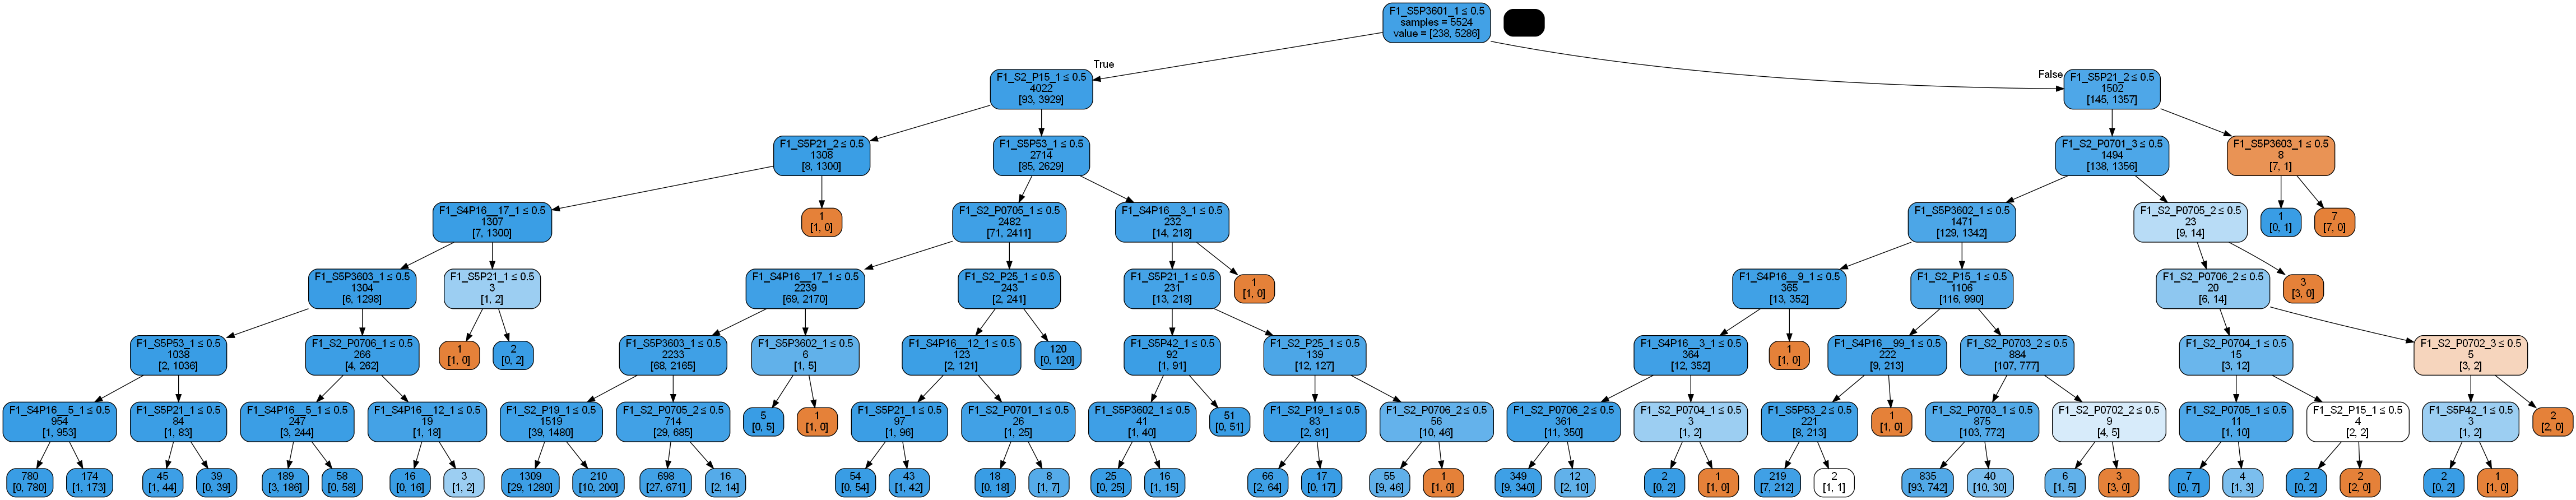

In [254]:
fullClassTree = DecisionTreeClassifier(random_state=0, max_depth=7)
fullClassTree.fit(train_x, train_y)

print('Orden de clases: '+ str(fullClassTree.classes_))

plotDecisionTree(fullClassTree, feature_names=train_x.columns)

In [257]:
classificationSummary(train_y, fullClassTree.predict(train_x))
classificationSummary(valid_y, fullClassTree.predict(valid_x))

Confusion Matrix (Accuracy 0.9616)

       Prediction
Actual    0    1
     0   27  211
     1    1 5285
Confusion Matrix (Accuracy 0.9427)

       Prediction
Actual    0    1
     0    4  197
     1   14 3469


In [261]:
param_grid = {
    'max_depth': [7, 8, 9, 10], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1)

gridSearch.fit(train_x, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9576391618837959
Initial parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 40}


In [263]:
param_grid = {
    'max_depth': [2,3,4,5,6,7], 
    'min_samples_split': list(range(10, 40)), 
    'min_impurity_decrease': [0.001, 0.002, 0.003, 0.004], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1)

gridSearch.fit(train_x, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.9576391618837959
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_split': 12}


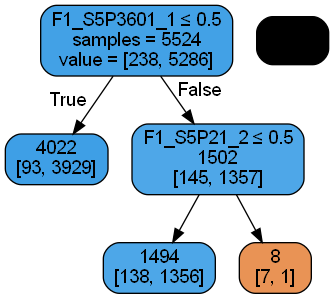

In [265]:
bestClassTree = gridSearch.best_estimator_
plotDecisionTree(bestClassTree, feature_names=train_x.columns)

In [266]:
classificationSummary(train_y, bestClassTree.predict(train_x))
classificationSummary(valid_y, bestClassTree.predict(valid_x))

Confusion Matrix (Accuracy 0.9580)

       Prediction
Actual    0    1
     0    7  231
     1    1 5285
Confusion Matrix (Accuracy 0.9454)

       Prediction
Actual    0    1
     0    0  201
     1    0 3483


In [269]:
recall = 3483/(3483+0)
print('Recall:', recall)
print(f'{"Recall":10} ==> {recall:.2f}')
print(f'{"Precision":10} ==> {3483/(3483+201):.2f}')

Recall: 1.0
Recall     ==> 1.00
Precision  ==> 0.95


In [275]:
encoded_data

,F1_S2_P0701_1,F1_S2_P0701_2,F1_S2_P0701_3,F1_S2_P0702_1,F1_S2_P0702_2,F1_S2_P0702_3,F1_S2_P0703_1,F1_S2_P0703_2,F1_S2_P0703_3,F1_S2_P0704_1,...,F1_S5P3504_1,F1_S5P3506_1,F1_S5P3601_1,F1_S5P3602_1,F1_S5P3603_1,F1_S5P42_1,F1_S5P42_2,F1_S5P53_1,F1_S5P53_2,F1_S5P41__7
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,0,1
14,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
23,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,1
24,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31279,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,1
31284,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
31295,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
31314,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


#### Model Deployment

In [1]:
output_model_file = 'modelo.pkl'

### Conclusiones

### Referencias

1. Apuntes tomados de clase
2. [Pandas](https://pandas.pydata.org/docs/index.html)
2. [Censo Penitenciario Ecuador 2022](https://www.ecuadorencifras.gob.ec/censo-penitenciario-2022/)
